In [32]:
import sys

import netCDF4
from netCDF4 import Dataset

import numpy as np
import xarray as xr

# --- plotting and interactive stuff ----------------------
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import fftconvolve

cNorm = mcolors.Normalize(vmin=0, vmax=2)
jet = plt.get_cmap('jet')
mpl.rcParams.update({'figure.figsize':[10,6],'axes.grid' : True,'font.size': 14,'savefig.facecolor':'white'})


import matplotlib.pyplot as plt
import scipy.io
import os
import pathlib

import time

import swot_ssh_utils as swot

In [77]:

sgdr_dir = pathlib.Path('')
WHALES_dir = pathlib.Path('WHALES/')
WHALES_dir0 = pathlib.Path('WHALES0/')
WHALES_dir2 = pathlib.Path('WHALES2/')

file='SWOT_GPS_2PfP549_004_20230611_125241_20230611_134346.nc'
file='SWOT_GPS_2PfP543_023_20230606_055941_20230606_065047.nc'
# NB: the following file was copied here : https://drive.google.com/drive/folders/1bjSd-1Z_2hjfIlX1Kl3Uar5GdIJ-ocGI?usp=sharing 
file='SWOT_GPS_2PfP545_021_20230608_035845_20230608_044951.nc'
# it contains cases with very high wave height (10 m) and high Qkk (60+) (according to model)
#               Hs     Qkk                 date                      lon     lat
#inds: 445085 9.7314 61.67151163033704 2023-06-08T04:00:00.000000000 113.5 -51.5
#inds: 445220 10.035836 50.305581986672394 2023-06-08T04:00:00.000000000 115.5 -45.0
#inds: 446091 10.130009 56.407127443549165 2023-06-08T04:30:00.000000000 115.5 -46.5

filesgdr = sgdr_dir/file
filewhales = WHALES_dir/file
filewhales0 = WHALES_dir0/file
filewhales2 = WHALES_dir2/file

# Compare WHALES retracking with SGDR data (MLE4 in the case of SWOT)

In [78]:
print('##',filesgdr,'##')
#xr.open_dataset(filesgdr) #.rename_dims({'meas_ind':'records'}).rename_vars({'meas_ind':'records'})
ds_sgdr = netCDF4.Dataset(filesgdr, 'r')
 
#print(ds_sgdr)
print('##',filewhales,'##')
ds_whales =xr.open_dataset(filewhales)
#ds_whales0 =xr.open_dataset(filewhales0)
ds_whales2 =xr.open_dataset(filewhales2)


## SWOT_GPS_2PfP545_021_20230608_035845_20230608_044951.nc ##
## WHALES/SWOT_GPS_2PfP545_021_20230608_035845_20230608_044951.nc ##


In [94]:
#quals=ds_sgdr['data_01']['ku'].variables['swh_ocean_compression_qual']
#ds_sgdr0 = ds_sgdr['data_01']['ku'].where(quals==0,drop=True)
swh_sgdr0=ds_sgdr['data_01']['ku'].variables['swh_ocean']
std_sgdr0=ds_sgdr['data_01']['ku'].variables['swh_ocean_rms']
swh_sgdm0=ds_sgdr['data_01']['ku'].variables['swh_ocean_mle3']
std_sgdm0=ds_sgdr['data_01']['ku'].variables['swh_ocean_mle3_rms']
swh_sgda0=ds_sgdr['data_01']['ku'].variables['swh_adaptive']
std_sgda0=ds_sgdr['data_01']['ku'].variables['swh_adaptive_rms']
lat_bounds=[-37,-34];
lat_bounds=[-60,-40];
lat=np.nanmedian(ds_whales.lat_20hz,axis=1)
l0,l1=lat_bounds
        
flagsum=np.sum(ds_whales.swh_WHALES_qual_20hz,axis=1)
print(np.shape(lat),'##',np.shape(flagsum))
inds=np.where(np.logical_and(np.logical_and(flagsum==0,lat >= l0),lat <=l1 ) )[0]
print('lat:',lat[inds[0]],lat[inds[-1]],np.min(lat[inds]))
swh_sgdr=swh_sgdr0[inds]
std_sgdr=std_sgdr0[inds]
swh_sgdm=swh_sgdm0[inds]
std_sgdm=std_sgdm0[inds]
swh_sgda=swh_sgda0[inds]
std_sgda=std_sgda0[inds]
#print(swh_sgdr,'##',inds) 
swh_whales20=ds_whales.variables['swh_WHALES_20hz']
lat_whales20=ds_whales.variables['lat_20hz']
swh_whales0=np.nanmedian(swh_whales20.values,axis=1)
std_whales0=np.nanstd(swh_whales20.values,axis=1)
print(np.shape(swh_whales20))
lat_whales0=np.nanmedian(lat_whales20.values,axis=1)
print(np.shape(swh_whales0))
lat_whales=lat_whales0[inds]
swh_whales=swh_whales0[inds]
std_whales=std_whales0[inds]
#swh_whales20=ds_whales0.variables['swh_WHALES_20hz']
#swh_whales0=np.nanmedian(swh_whales20.values,axis=1)
#std_whales0=np.nanstd(swh_whales20.values,axis=1)
#swh0_whales=swh_whales0[inds]
#std0_whales=std_whales0[inds]
swh_whales20=ds_whales2.variables['swh_WHALES_20hz']
swh_whales0=np.nanmedian(swh_whales20.values,axis=1)
std_whales0=np.nanstd(swh_whales20.values,axis=1)
swh2_whales=swh_whales0[inds]
std2_whales=std_whales0[inds]
print(np.nanstd(swh_whales),'##', np.nanstd(swh_sgdr))

(2900,) ## (2900,)
lat: -59.99732949999999 -40.011198 -59.99732949999999
(2900, 20)
(2900,)
1.2975521419022424 ## 1.3011366536041642


/tmp/ipykernel_975319/799860011.py:27: RuntimeWarning: All-NaN slice encountered
  swh_whales0=np.nanmedian(swh_whales20.values,axis=1)
/home/ardhuin/.local/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_975319/799860011.py:41: RuntimeWarning: All-NaN slice encountered
  swh_whales0=np.nanmedian(swh_whales20.values,axis=1)


/tmp/ipykernel_975319/2609600228.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmax' will be ignored
  im=ax.scatter(swh_sgdr,swh_whales,vmax=10)


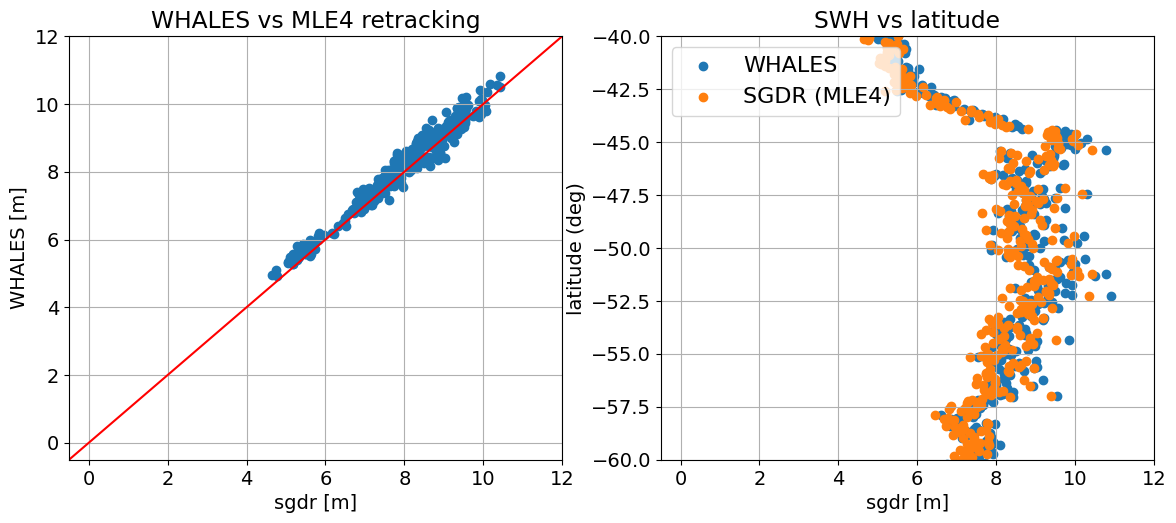

In [102]:
fig,axs = plt.subplots(1,2,figsize=(14,5.5))
ax = axs[0]
im=ax.scatter(swh_sgdr,swh_whales,vmax=10)
ax.grid(True)
ax.axline([1,1],slope=1,color='r')
ax.set_xlim((-0.5,12))
ax.set_ylim((-0.5,12))
ax.set_xlabel('sgdr [m]')
ax.set_ylabel('WHALES [m]')
ax.set_title('WHALES vs MLE4 retracking')

ax = axs[1]
im=ax.scatter(swh_whales0,lat_whales0,label='WHALES')
im=ax.scatter(swh_sgdr,lat_whales,label='SGDR (MLE4)')
ax.grid(True)
ax.set_xlim((-0.5,12))
ax.set_ylim((-60,-40))
ax.set_xlabel('sgdr [m]')
ax.set_ylabel('latitude (deg)')
ax.set_title('SWH vs latitude')
leg = ax.legend(loc='upper left', fontsize=16)


(343,) (343,)
(343,) (343,)


Text(0.5, 1.0, 'std($H_s$)')

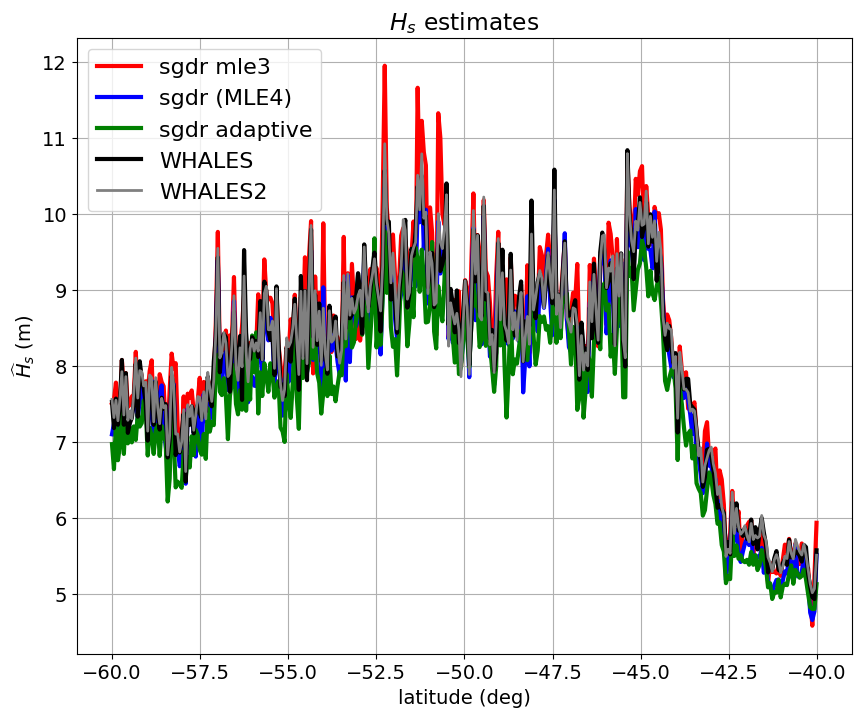

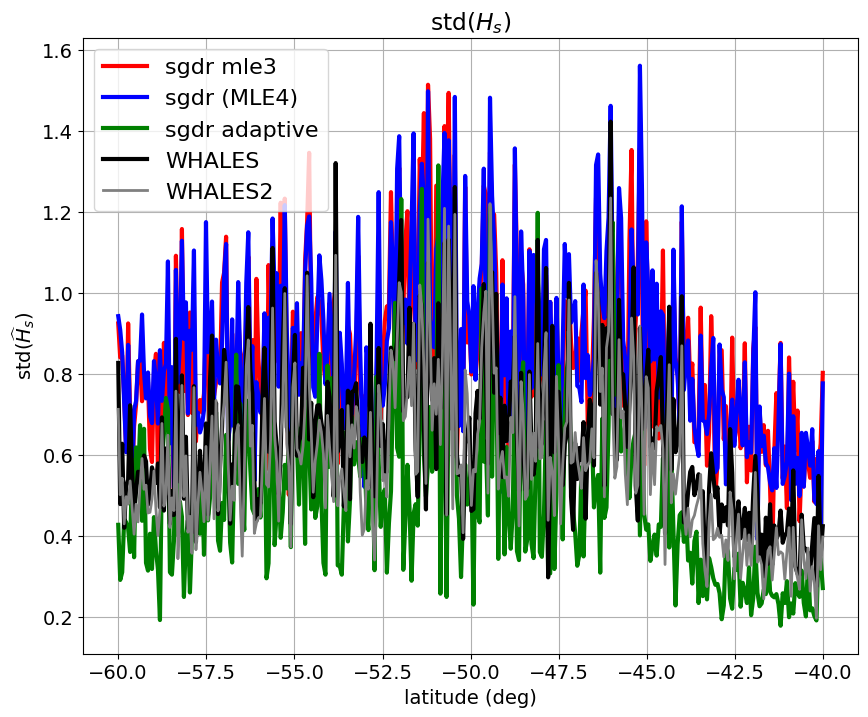

In [99]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
print(np.shape(lat_whales0[inds]),np.shape(swh_whales))
ax.plot(lat_whales0[inds],swh_sgdm,c='red',linewidth=3,label='sgdr mle3')
ax.plot(lat_whales0[inds],swh_sgdr,c='blue',linewidth=3,label='sgdr (MLE4)')
ax.plot(lat_whales0[inds],swh_sgda,c='green',linewidth=3,label='sgdr adaptive')
ax.plot(lat_whales0[inds],swh_whales,c='black',linewidth=3,label='WHALES')
#ax.plot(lat_whales0[inds],swh0_whales,c='black',linewidth=1,label='MLE3')
ax.plot(lat_whales0[inds],swh2_whales,c='grey',linewidth=2,label='WHALES2')
ax.grid(True)
ax.set_xlabel('latitude (deg)')
ax.set_ylabel('$\widehat{H}_s$ (m)') 
leg = ax.legend(loc='upper left', fontsize=16)
ax.set_title(r'$H_s$ estimates')

fig,ax = plt.subplots(1,1,figsize=(10,8))
print(np.shape(lat_whales0[inds]),np.shape(std_whales))
ax.plot(lat_whales0[inds],std_sgdm,c='red',linewidth=3,label='sgdr mle3')
ax.plot(lat_whales0[inds],std_sgdr,c='blue',linewidth=3,label='sgdr (MLE4)')
ax.plot(lat_whales0[inds],std_sgda,c='green',linewidth=3,label='sgdr adaptive')
ax.plot(lat_whales0[inds],std_whales,c='black',linewidth=3,label='WHALES')
#ax.plot(lat_whales0[inds],std0_whales,c='black',linewidth=1,label='MLE3')
ax.plot(lat_whales0[inds],std2_whales,c='grey',linewidth=2,label='WHALES2')
ax.grid(True)
ax.set_xlabel('latitude (deg)')
ax.set_ylabel(r'$\mathrm{std}(\widehat{H}_s)$')
leg = ax.legend(loc='upper left', fontsize=16)
ax.set_title(r'std($H_s$)')

#ax.set_title('(b) without noise')